## Practical Work 2
# **Prepaied by Dr. Hatem el-attar **

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

# **Step_1 :** Import numpy, matplotlib.pyplot and make it inline

In [80]:
import numpy as np
import matplotlib.pyplot as plt

**Step_2:** To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
 <b>yi = a*xi + b (and a = -2, b = 1)</b>


In [145]:
x = np.linspace(0,20,20)
x

array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
        5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
       10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
       15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ])

In [146]:
y = -2*x +1
y

array([  1.        ,  -1.10526316,  -3.21052632,  -5.31578947,
        -7.42105263,  -9.52631579, -11.63157895, -13.73684211,
       -15.84210526, -17.94736842, -20.05263158, -22.15789474,
       -24.26315789, -26.36842105, -28.47368421, -30.57894737,
       -32.68421053, -34.78947368, -36.89473684, -39.        ])

Step_3: plot x and y

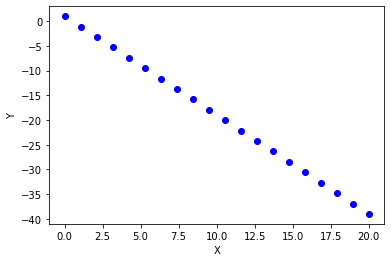

In [83]:
plt.scatter(x,y,color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


#### **Step_4:** Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [84]:
def GD(X,Y,alpha=0.001,itr=1000):
    theta_0 =0
    theta_1 = 0
    thetas=[]
    loss=[]
    h_pre=[]
    for i in range(itr):
        h = theta_0 + theta_1*X
        h_pre.append(h)
        j_cost = (1/(2*len(X)))*sum((h-Y)**2)
        loss.append(j_cost)
        g0 = (1/len(X))*sum(h-Y)
        g1=(1/len(X))*sum((h-Y)*X)
        theta_0 = theta_0 - alpha*g0
        theta_1 = theta_1 - alpha*g1
        thetas.append([theta_0,theta_1])
        
    return thetas,loss,h_pre    
        
    
Thetas , Loss , h_pred = GD(x,y)
#print(Thetas)
#print(Loss)

#### **Step_5:** Try your function with any input parameters of your choice.

In [85]:
Opt_loss = min(Loss)
print(Opt_loss)
index_of_loss = Loss.index(0.10250692185719967)
print(index_of_loss) 
lis = Thetas[999]
print(Thetas[999])
opt_theta_0 = lis[0]
opt_theta_1 = lis[1]

0.10250692185719967
999
[0.12761003117909656, -1.9361234198865362]


#### **Step_6:** Calculate r2 score

In [86]:
y_predict = opt_theta_0 + opt_theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9986095796343896


In [87]:
#h_pred

#### **Step_7:** Plot loss vs. epochs

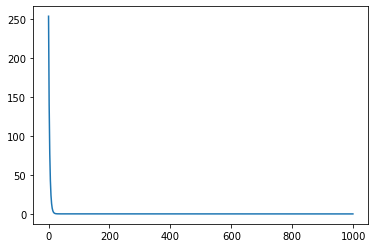

In [88]:
plt.plot(Loss)
plt.show()

In [94]:
_Thetas= np.array(Thetas)
#print(_Thetas[:,0])
#print(_Thetas[-1,1])

#### **Step_8:** Plot Theta_0 vs. loss and Theta_1 vs. loss

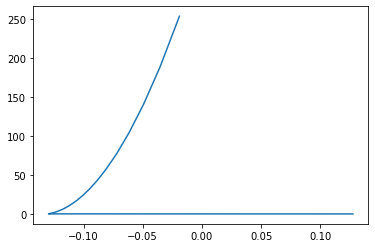

In [90]:
plt.plot(_Thetas[:,0],Loss)
plt.show()

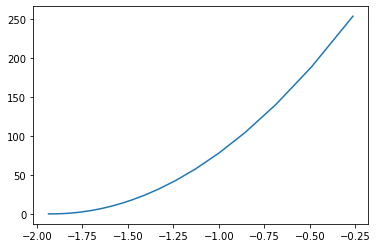

In [91]:
plt.plot(_Thetas[:,1],Loss)
plt.show()

#### **Step_9:** Plot all regression lines till converge

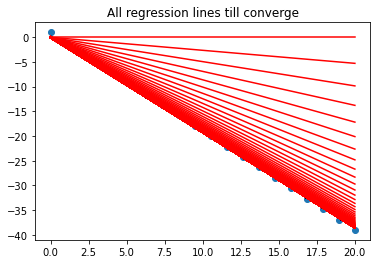

In [92]:
plt.scatter(x,y)
for i in range(0,len(h_pred)):
    plt.plot(x,h_pred[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

#### **[Step_10:](https://)** Plot the best regression line

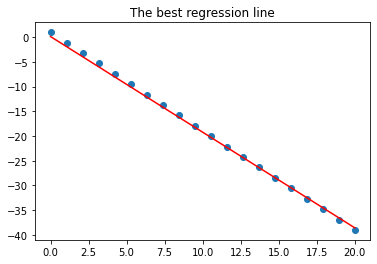

In [93]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

#### **Step_11:** Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [126]:
#alpha = 0.006 & iterations = 100
Thetas , Loss , h_pred = GD(x,y,alpha=0.006,itr=100)

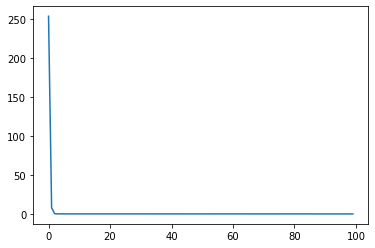

In [128]:
plt.plot(Loss)
plt.show()

In [129]:
#Opt_loss = min(Loss)
#print(Opt_loss)
#index_of_loss = Loss.index(0.060018639880190586)
#print(index_of_loss) 
#lis = Thetas[99]
#print(Thetas[99])
#opt_theta_0 = lis[0]
#opt_theta_1 = lis[1]

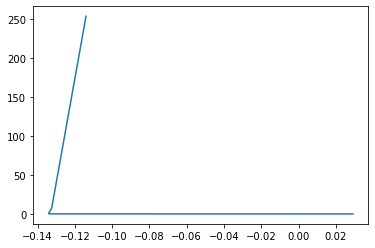

In [130]:
_Thetas= np.array(Thetas)
plt.plot(_Thetas[:,0],Loss)
plt.show()

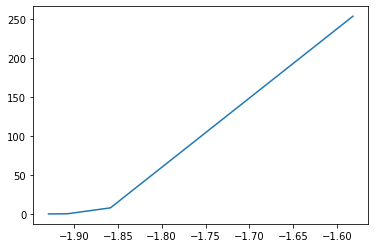

In [131]:
plt.plot(_Thetas[:,1],Loss)
plt.show()

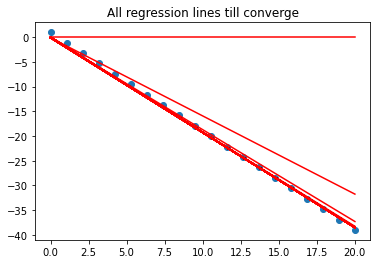

In [132]:
plt.scatter(x,y)
for i in range(0,len(h_pred)):
    plt.plot(x,h_pred[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

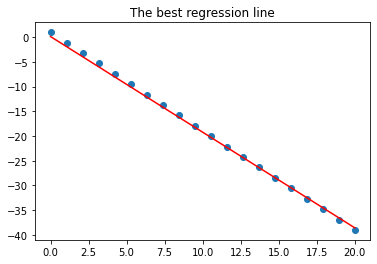

In [133]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

#### **Step_12:** Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [210]:
x = np.linspace(0,20,2000)
x

array([0.00000000e+00, 1.00050025e-02, 2.00100050e-02, ...,
       1.99799900e+01, 1.99899950e+01, 2.00000000e+01])

In [211]:
y = -2*x +1
y

array([  1.        ,   0.97998999,   0.95997999, ..., -38.95997999,
       -38.97998999, -39.        ])

In [212]:
def mini_GD(X,Y,b,itr=100):
    alpha=0.01
    theta_0 =0
    theta_1 = 0
    thetas=[]
    loss=[]
    h_pre=[]
    x_list=[]
    u = int(len(X)/b)
    for i in range(itr):
        for j in range(u):
            h = theta_0 + theta_1*X[j*b:(j+1)*b]
            h_pre.append(h)
            x_list.append(X[j*b:(j+1)*b])
            j_cost = (1/(2*b))*sum((h-Y[j*b:(j+1)*b])**2)
            loss.append(j_cost)
            g0 = (1/b)*sum(h-Y[j*b:(j+1)*b])
            g1=(1/b)*sum((h-Y[j*b:(j+1)*b])*X[j*b:(j+1)*b])
            theta_0 = theta_0 - alpha*g0
            theta_1 = theta_1 - alpha*g1
            thetas.append([theta_0,theta_1])
        
    return thetas,loss,h_pre,x_list   

In [206]:
Thetas , Loss , h_pred,X_list = mini_GD(x,y,b=32)

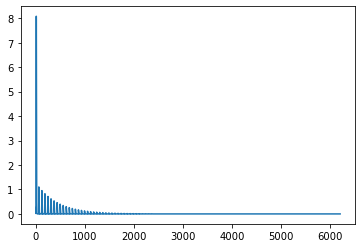

In [207]:
plt.plot(Loss)
plt.show()

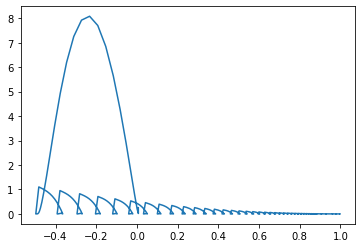

In [187]:
_Thetas= np.array(Thetas)
plt.plot(_Thetas[:,0],Loss)
plt.show()

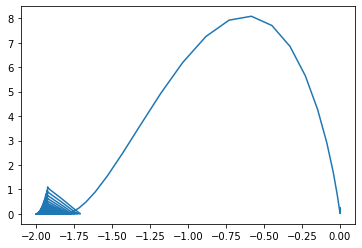

In [188]:
plt.plot(_Thetas[:,1],Loss)
plt.show()

In [190]:
h_pred

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.00718631, 0.00719531, 0.0072043 , 0.0072133 , 0.0072223 ,
        0.00723129, 0.00724029, 0.00724928, 0.00725828, 0.00726727,
        0.00727627, 0.00728527, 0.00729426, 0.00730326, 0.00731225,
        0.00732125, 0.00733024, 0.00733924, 0.00734824, 0.00735723,
        0.00736623, 0.00737522, 0.00738422, 0.00739321, 0.00740221,
        0.00741121, 0.0074202 , 0.0074292 , 0.00743819, 0.00744719,
        0.00745618, 0.00746518]),
 array([0.00791525, 0.00792454, 0.00793383, 0.00794313, 0.00795242,
        0.00796172, 0.00797101, 0.0079803 , 0.0079896 , 0.00799889,
        0.00800819, 0.00801748, 0.00802677, 0.00803607, 0.00804536,
        0.00805465, 0.00806395, 0.00807324, 0.00808254, 0.00809183,
        0.00810112, 0.00811042, 0.00811971, 0.00812901, 0.0081383 ,
        0.00814759, 0.00815689, 0.00816618, 0.00817548, 0.00818477,
    

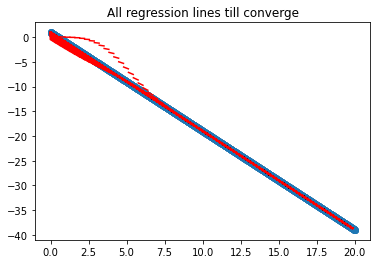

In [196]:
plt.scatter(x,y)
for i in range(0,len(h_pred)):
    plt.plot(X_list[i],h_pred[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

In [203]:
Opt_loss = min(Loss)
print(Opt_loss)
index_of_loss = Loss.index(2.4712205694546412e-11)
print(index_of_loss) 
lis = Thetas[6199]
print(Thetas[6199])
opt_theta_0 = lis[0]
opt_theta_1 = lis[1]



2.4712205694546412e-11
6199
[0.998882148360675, -1.9999438997929604]


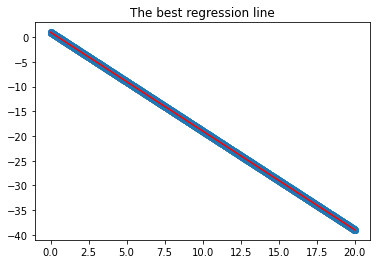

In [204]:
y_predict = opt_theta_0 + opt_theta_1 * x
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

In [208]:
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9999999968899054


## Stochastic GD

#### **Step_13**: Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [223]:
def sto_GD(X,Y,alpha=0.001,itr=1000):
    theta_0 =0
    theta_1 = 0
    thetas=[]
    loss=[]
    h_pre=[]
    x_list=[]
    for i in range(itr):
        for j in range(len(X)):
            h = theta_0 + theta_1*X[j]
            h_pre.append(h)
            x_list.append(X[j])
            j_cost = (h-Y[j])**2
            loss.append(j_cost)
            g0 = 2*(np.sum(h-Y[j]))
            g1=2*(np.sum((h-Y[j])*X[j]))
            theta_0 = theta_0 - alpha*g0
            theta_1 = theta_1 - alpha*g1
            thetas.append([theta_0,theta_1])
        
    return thetas,loss,h_pre,x_list    
        
    
Thetas , Loss , h_pred,X_list = sto_GD(x,y)

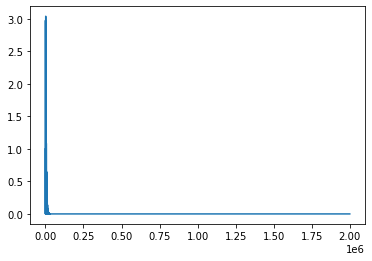

In [222]:
plt.plot(Loss)
plt.show()

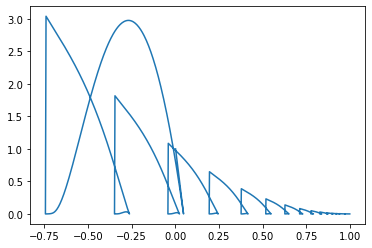

In [219]:
_Thetas= np.array(Thetas)
plt.plot(_Thetas[:,0],Loss)
plt.show()

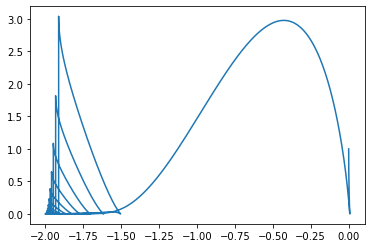

In [220]:
plt.plot(_Thetas[:,1],Loss)
plt.show()

In [232]:
min(Loss)
Opt_loss = min(Loss)
#print(Opt_loss)
index_of_loss = Loss.index(0.0)
print(index_of_loss) 
lis = Thetas[201992]
print(Thetas[6199])
opt_theta_0 = lis[0]
opt_theta_1 = lis[1]

201992
[0.2346533335471746, -1.7280843575138545]


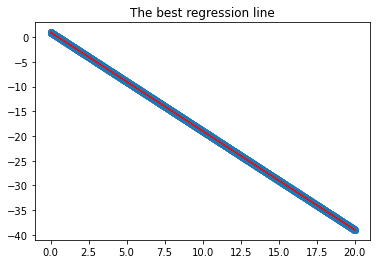

In [233]:
y_predict = opt_theta_0 + opt_theta_1 * x
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

In [ ]:
#alpha = 0.002
Thetas , Loss , h_pred,X_list = sto_GD(x,y,alpha=0.002)

In [ ]:
plt.plot(Loss)
plt.show()

In [ ]:
_Thetas= np.array(Thetas)
plt.plot(_Thetas[:,0],Loss)
plt.show()

In [ ]:
plt.plot(_Thetas[:,1],Loss)
plt.show()

In [ ]:
y_predict = opt_theta_0 + opt_theta_1 * x
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()